# Editorial

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

## Read training data

In [2]:
data = pd.read_csv('train_dataset.csv')
data.describe()

,Id,monthly_income,age,experience,years_employed,age_house,ineligible_for_funds
count,189000.000000,171287.000000,189000.000000,189000.000000,189000.000000,171679.000000,189000.000000
mean,94500.500000,415841.471194,49.938423,11.148342,6.331286,11.999563,0.123000
std,54559.744776,239876.709190,17.065674,6.024009,3.647843,1.399825,0.328438
min,1.000000,815.733899,21.000000,0.000387,0.000000,10.000000,0.000000
25%,47250.750000,207600.489499,35.000000,5.996552,3.000000,11.000000,0.000000
50%,94500.500000,415772.673367,50.000000,11.145800,6.000000,12.000000,0.000000
75%,141750.250000,622848.639009,65.000000,16.347906,9.000000,13.000000,0.000000
max,189000.000000,833500.487477,79.000000,23.351739,14.000000,14.000000,1.000000


## Split data into train and val set

In [3]:
skf = StratifiedKFold(random_state=12, n_splits=8, shuffle=True)

X, y = data.drop('ineligible_for_funds', axis=1), data['ineligible_for_funds']

train_index, val_index = next(skf.split(X, y))

train = data.iloc[train_index].copy(deep=True)
val = data.iloc[val_index].copy(deep=True)

## EDA

In [4]:
train.head()

,Id,monthly_income,age,experience,has_child,residential_status,owns_bike,profession,home_city,home_state,years_employed,age_house,ineligible_for_funds
1,2,386858.796687,55,14.843088,no,NaN,no,Drafter,Whittier,Virginia,13,NaN,1
2,3,701707.897308,31,0.753429,no,on_rent,no,Geologist,Johnstown,North_Carolina,0,14.0,1
3,4,NaN,47,2.082146,no,on_rent,no,Surveyor,Paragould,Indiana,1,10.0,1
5,6,436576.423621,65,5.110069,no,on_rent,no,Police_officer,Reno,Tennessee,3,12.0,1
6,7,81047.323778,54,14.085262,no,on_rent,yes,Comedian,Koyukuk,North Carolina,13,12.0,1


In [5]:
val.head()

,Id,monthly_income,age,experience,has_child,residential_status,owns_bike,profession,home_city,home_state,years_employed,age_house,ineligible_for_funds
0,1,467513.915421,52,8.001408,no,on_rent,no,Physician,Newport,Iowa,7,14.0,1
4,5,669171.434848,65,7.381569,no,NaN,no,Civil_engineer,Richmond,Virginia,6,NaN,1
28,29,532012.792857,68,8.165787,no,on_rent,yes,Financial_Analyst,Alice,Virginia,4,13.0,1
31,32,196510.328475,59,1.240000,no,on_rent,NaN,Army_officer,Winston-Salem,California,1,12.0,1
43,44,35134.357516,41,2.079418,no,on_rent,no,Politician,Dublin,Indiana,1,11.0,1


<AxesSubplot:xlabel='monthly_income', ylabel='Count'>

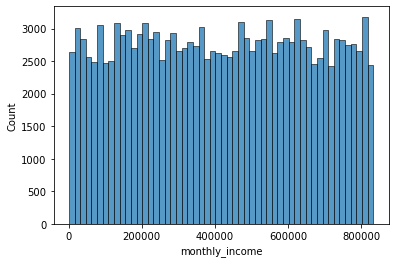

In [6]:
sns.histplot(data=train['monthly_income'])

<AxesSubplot:xlabel='age', ylabel='Count'>

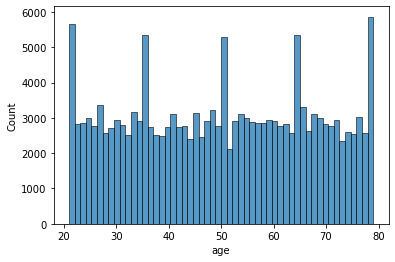

In [7]:
sns.histplot(data=train['age'] )

In [8]:
for i in train.columns:
    print(i, train[i].isnull().sum())

Id 0
monthly_income 15504
age 0
experience 0
has_child 0
residential_status 15120
owns_bike 15668
profession 0
home_city 0
home_state 0
years_employed 0
age_house 15120
ineligible_for_funds 0


### Imputing value for `monthly income`

In [9]:
age = {i: 0 for i in range(21, 80)}
tot_sal = {i: 0 for i in range(21, 80)}
for i, r in train.iterrows():
    age[r['age']] += 1
    if pd.notna(r['monthly_income']):
        tot_sal[r['age']] += r['monthly_income']

In [10]:
print(age, tot_sal)

{21: 2738, 22: 2914, 23: 2823, 24: 2859, 25: 2990, 26: 2775, 27: 3364, 28: 2575, 29: 2700, 30: 2929, 31: 2800, 32: 2524, 33: 3171, 34: 2923, 35: 3045, 36: 2294, 37: 2755, 38: 2512, 39: 2490, 40: 2750, 41: 3109, 42: 2733, 43: 2774, 44: 2405, 45: 3135, 46: 2445, 47: 2925, 48: 3234, 49: 2771, 50: 3022, 51: 2275, 52: 2126, 53: 2922, 54: 3120, 55: 2985, 56: 2886, 57: 2864, 58: 2865, 59: 2946, 60: 2919, 61: 2759, 62: 2830, 63: 2561, 64: 2733, 65: 2618, 66: 3299, 67: 2631, 68: 3101, 69: 3005, 70: 2815, 71: 2760, 72: 2941, 73: 2348, 74: 2608, 75: 2533, 76: 3015, 77: 2561, 78: 2899, 79: 2966} {21: 1010611458.0603219, 22: 1131588204.386621, 23: 1042600512.6611443, 24: 1117006088.9472513, 25: 1167250051.8807886, 26: 1131372378.2770247, 27: 1239086406.811223, 28: 949203866.3834547, 29: 1011465380.2808902, 30: 1117332157.3362148, 31: 1077571319.0557508, 32: 877006132.1650648, 33: 1027744442.789163, 34: 1081220244.4195287, 35: 1175257763.1085255, 36: 861369844.7011477, 37: 1036953782.1203816, 38: 10

In [11]:
for i in tot_sal:
        tot_sal[i] = tot_sal[i]/age[i]
print(tot_sal)

{21: 369105.71879485826, 22: 388328.1415190875, 23: 369323.5964084818, 24: 390698.17731628235, 25: 390384.6327360497, 26: 407701.75793766655, 27: 368337.2196228368, 28: 368622.86073143873, 29: 374616.8075114408, 30: 381472.22852038743, 31: 384846.8996627682, 32: 347466.77185620635, 33: 324107.3613337001, 34: 369900.8704822199, 35: 385963.1405939328, 36: 375488.1624678063, 37: 376389.7575754561, 38: 403161.9661395993, 39: 354459.14723238867, 40: 387755.87694523897, 41: 390083.2365075963, 42: 385509.2620727007, 43: 394527.3369873456, 44: 367839.42267331673, 45: 346036.6082005975, 46: 380437.8499967507, 47: 371372.56297319476, 48: 397967.1023340493, 49: 390960.1006536662, 50: 360252.4120358267, 51: 403057.2635141367, 52: 371620.47567318677, 53: 386182.48600634764, 54: 357198.4927199569, 55: 412273.36439483496, 56: 371047.061213022, 57: 379108.3688489344, 58: 382366.56313009845, 59: 368317.8609475893, 60: 386298.10147407034, 61: 422923.75991470774, 62: 374509.1086470847, 63: 402458.4119369

In [12]:
train.loc[:, 'monthly_income'] = train.apply(lambda x: tot_sal[x.age] if pd.isna(x.monthly_income) else x.monthly_income, axis=1)
val.loc[:, 'monthly_income'] = val.apply(lambda x: tot_sal[x.age] if pd.isna(x.monthly_income) else x.monthly_income, axis=1)

### Imputing value for `owns_bike`

In [13]:
for i in train.columns:
    print(i, train[i].isnull().sum())

Id 0
monthly_income 0
age 0
experience 0
has_child 0
residential_status 15120
owns_bike 15668
profession 0
home_city 0
home_state 0
years_employed 0
age_house 15120
ineligible_for_funds 0


In [14]:
train.owns_bike.value_counts()

no     104590
yes     45117
Name: owns_bike, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

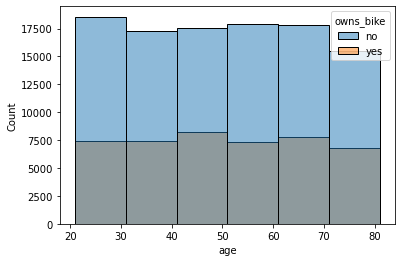

In [15]:
sns.histplot(train, x='age', binwidth=10, hue='owns_bike', multiple='layer')

In [16]:
train.loc[:, 'owns_bike'] = train.apply(lambda x: 'no' if pd.isna(x.owns_bike) else x.owns_bike, axis=1) # we're imputing 'no' as its highest probable class
val.loc[:, 'owns_bike'] = val.apply(lambda x: 'no' if pd.isna(x.owns_bike) else x.owns_bike, axis=1)

### Imputing value for `monthly_income`

In [17]:
for i in train.columns:
    print(i, train[i].isnull().sum())

Id 0
monthly_income 0
age 0
experience 0
has_child 0
residential_status 15120
owns_bike 0
profession 0
home_city 0
home_state 0
years_employed 0
age_house 15120
ineligible_for_funds 0


In [18]:
train.residential_status.value_counts()

on_rent      138353
own_house      7673
no_house       4229
Name: residential_status, dtype: int64

<AxesSubplot:xlabel='monthly_income', ylabel='Count'>

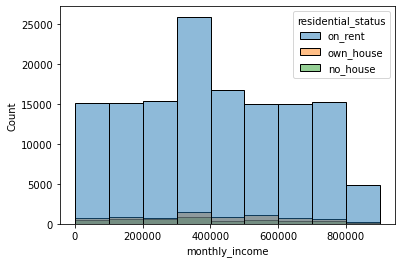

In [19]:
sns.histplot(train, x='monthly_income', binwidth=100000, hue='residential_status', multiple='layer')

In [20]:
train.residential_status = train.apply(lambda x: 'on_rent' if pd.isna(x.residential_status) else x.residential_status, axis=1)
val.residential_status = val.apply(lambda x: 'on_rent' if pd.isna(x.residential_status) else x.residential_status, axis=1)

### We drop `age_house` as the values are distributed almost equally over all bins

In [21]:
for i in train.columns:
    print(i, train[i].isnull().sum())

Id 0
monthly_income 0
age 0
experience 0
has_child 0
residential_status 0
owns_bike 0
profession 0
home_city 0
home_state 0
years_employed 0
age_house 15120
ineligible_for_funds 0


In [22]:
train.age_house.value_counts()

12.0    30840
11.0    30837
13.0    30338
14.0    29265
10.0    28975
Name: age_house, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

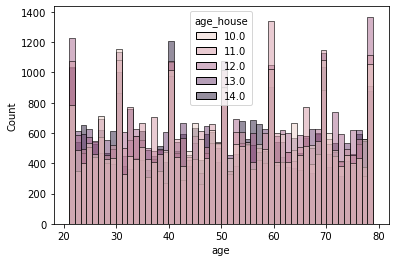

In [23]:
sns.histplot(train, x='age', hue='age_house', multiple='layer')

In [24]:
train = train.drop(['age_house'], axis=1)
val = val.drop(['age_house'], axis=1)

## Transform features

In [25]:
train.columns

Index(['Id', 'monthly_income', 'age', 'experience', 'has_child',
       'residential_status', 'owns_bike', 'profession', 'home_city',
       'home_state', 'years_employed', 'ineligible_for_funds'],
      dtype='object')

In [26]:
train.profession.value_counts()

Physician                     3886
Statistician                  3802
Magistrate                    3524
Web_designer                  3519
Drafter                       3519
Computer_hardware_engineer    3493
Psychologist                  3491
Air_traffic_controller        3485
Fashion_Designer              3467
Technical_writer              3452
Comedian                      3449
Chemical_engineer             3425
Industrial_Engineer           3410
Hotel_Manager                 3405
Financial_Analyst             3400
Graphic_Designer              3383
Mechanical_engineer           3373
Biomedical_Engineer           3349
Software_Developer            3338
Flight_attendant              3320
Petroleum_Engineer            3292
Police_officer                3287
Secretary                     3271
Politician                    3234
Microbiologist                3223
Computer_operator             3223
Lawyer                        3185
Artist                        3183
Technician          

In [27]:
train.home_city.value_counts() # it can be seen that some strings have things appended to them

Winter Haven       1012
Gary                937
Harrisonburg        753
Burlington          739
Bozeman             702
                   ... 
Columbus[36]          1
Scottsbluff[17]       1
Waycross[63]          1
Pensacola[58]         1
Monterey[64]          1
Name: home_city, Length: 9833, dtype: int64

In [28]:
test = pd.read_csv('test_dataset.csv')
test.describe()

,Id,monthly_income,age,experience,years_employed,age_house
count,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000
mean,220500.500000,417263.437393,50.001016,11.191371,6.341651,11.994413
std,18186.677816,239689.206316,17.058478,6.018964,3.644700,1.395776
min,189001.000000,837.316831,21.000000,0.002326,0.000000,10.000000
25%,204750.750000,209549.405094,35.000000,6.047270,4.000000,11.000000
50%,220500.500000,418093.907188,50.000000,11.218748,6.000000,12.000000
75%,236250.250000,623312.435637,65.000000,16.389425,9.000000,13.000000
max,252000.000000,833453.440655,79.000000,22.975283,14.000000,14.000000


In [29]:
for i in test.columns:
    print(i, test[i].isna().sum())

Id 0
monthly_income 0
age 0
experience 0
has_child 0
residential_status 0
owns_bike 0
profession 0
home_city 0
home_state 0
years_employed 0
age_house 0


In [30]:
import re
'''
We're doing this to remove those '[6]' type things appended to some strings 
    and also replacing spaces with '-' as a few strings are seperated by this rather than spaces.
'''
train['profession'] = train.profession.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))
train['home_city'] = train.home_city.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))
train['home_state'] = train.home_state.apply(lambda x: re.sub(r'\[[0-9*]*\]', '', '_'.join(x.split())))

test['profession'] = test.profession.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))
test['home_city'] = test.home_city.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))
test['home_state'] = test.home_state.apply(lambda x: re.sub(r'\[[0-9*]*\]', '', '_'.join(x.split())))

test['profession'] = test.profession.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))
test['home_city'] = test.home_city.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))
test['home_state'] = test.home_state.apply(lambda x: re.sub(r'\[[0-9*]*\]', '',  '_'.join(x.split())))

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
re = LabelEncoder().fit(train['residential_status'])

train['resi'] = re.transform(train['residential_status'])
val['resi'] = re.transform(val['residential_status'])
test['resi'] = re.transform(test['residential_status'])

In [33]:
hc = LabelEncoder().fit(train['has_child'])

train['hc'] = hc.transform(train['has_child'])
val['hc'] = hc.transform(val['has_child'])
test['hc'] = hc.transform(test['has_child'])

In [34]:
ob = LabelEncoder().fit(data['owns_bike'])

train['ob'] = ob.transform(train['owns_bike'])
val['ob'] = ob.transform(val['owns_bike'])
test['ob'] = ob.transform(test['owns_bike'])

In [35]:
pf = LabelEncoder().fit(data['profession'])

train['pf'] = pf.transform(train['profession'])
val['pf'] = pf.transform(val['profession'])
test['pf'] = pf.transform(test['profession'])

In [36]:
hci = LabelEncoder().fit(data['home_city'])

train['hci'] = hci.transform(train['home_city'])
val['hci'] = hci.transform(val['home_city'])
test['hci'] = hci.transform(test['home_city'])

In [37]:
hs = LabelEncoder().fit(data['home_state'])

train['hs'] = hs.transform(train['home_state'])
val['hs'] = hs.transform(val['home_state'])
test['hs'] = hs.transform(test['home_state'])

### We select the numeric and encoded features to be passed to the model

In [38]:
X_cols = ['monthly_income', 'age', 'experience', 'hc', 'resi', 'ob', 'pf', 'hci', 'hs', 'years_employed']

X_train = train[X_cols]
y_train = train['ineligible_for_funds']

X_val = val[X_cols]
y_val = val['ineligible_for_funds']

X_test = test[X_cols]

## Since the dataset is imbalanced we upsample 1 and downsample 0

In [39]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(random_state=0)
X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [40]:
X_sm

,monthly_income,age,experience,hc,resi,ob,pf,hci,hs,years_employed
0,724400.308991,61,3.741440,0,1,0,10,9062,2119,3
1,54254.886628,72,16.745524,0,1,0,4,7497,628,14
2,753938.108478,63,4.335981,0,1,1,44,9778,2423,3
3,257949.201949,45,10.712152,0,1,1,26,6888,897,4
4,54356.550522,68,9.710970,0,1,1,4,10743,2423,9
...,...,...,...,...,...,...,...,...,...,...
229585,881.550562,23,2.543454,0,1,1,27,8636,2119,1
229586,701681.804626,31,1.454632,0,1,0,26,4961,1579,0
229587,112037.421775,30,1.376202,0,0,0,7,9570,1941,0
229588,711464.196162,33,19.273595,0,1,0,48,10395,897,5


In [41]:
from sklearn.ensemble import RandomForestClassifier

# You could hyperparameter tune it to get better results..

clf = RandomForestClassifier( random_state=0, n_jobs=10)
clf.fit(X_sm, y_sm)

RandomForestClassifier(n_jobs=10, random_state=0)

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.9033180010687365

## We'll see how well it performs on the test data

In [43]:
test_label = pd.read_csv('test_labels_PRIVATE.csv')
test_label.describe()

,Id,ineligible_for_funds
count,63000.000000,63000.00000
mean,220500.500000,0.12300
std,18186.677816,0.32844
min,189001.000000,0.00000
25%,204750.750000,0.00000
50%,220500.500000,0.00000
75%,236250.250000,0.00000
max,252000.000000,1.00000


In [44]:
roc_auc_score(test_label.ineligible_for_funds, clf.predict_proba(X_test)[:, 1])

0.9630566612861603

In [45]:
sub = pd.DataFrame(columns=['Id', 'ineligible_for_funds'])

In [46]:
sub['Id'] = test['Id']

In [47]:
sub['ineligible_for_funds'] = clf.predict(X_test)

In [48]:
sub.head()

,Id,ineligible_for_funds
0,189001,0
1,189002,0
2,189003,0
3,189004,1
4,189005,1


In [49]:
sub.to_csv('submission', index=False)